# Введение в статистику и теорию вероятностей 

В этом ноутбуке мы познакомимся и поэкспериментируем с основными понятиями теории веротноятей и статистики. Многие необходимые для этого функции уже реализованы в библиотеках numpy, pandas или scipy или sklearn.

## Случайные величины 

**Вероятность** — это число между 0 и 1, которое выражает, насколько вероятно наступление **события**. Она определяется как количество благоприятных исходов (ведущих к событию), деленное на общее количество исходов, при условии, что все исходы равновероятны. Например, при броске игральной кости вероятность выпадения четного числа составляет 3/6 = 0.5.

Когда мы говорим о событиях, мы используем понятия **случайные величины**. Например, случайная величина, представляющая число, полученное при броске кости, может принимать значения от 1 до 6. Множество чисел от 1 до 6 называется **пространством исходов**. Мы можем говорить о вероятности того, что случайная величина примет определенное значение, например P{X=3}=1/6.

Библиотека `random` позволяет генерировать значения случайной величины:

In [150]:
import random

for _ in range(10):
    print(f"Значение: {random.randint(1,6)}")

Значение: 1
Значение: 3
Значение: 5
Значение: 3
Значение: 3
Значение: 3
Значение: 2
Значение: 3
Значение: 5
Значение: 5



Случайная величина в предыдущем примере называется **дискретной**, потому что ее пространство исходов - это отдельные числа или события, то есть имеются отдельные значения, которые можно перечислить. Бывают случаи, когда пространство исходов — это диапазон вещественных чисел или весь набор вещественных чисел. Такие переменные называются **непрерывными**. Хороший пример —  точное время прибытия автобуса.

## Распределение вероятностей

В случае дискретных случайных величин легко описать вероятность каждого события с помощью функции P(X). Для каждого значения *s* из пространства исходов *S* она возвращает число от 0 до 1 так, что сумма всех значений P(X=s) для всех событий будет равна 1.

Самое известное дискретное распределение — это **равномерное распределение**, при котором пространство исходов состоит из N элементов, и вероятность каждого из них составляет 1/N.

Рассмотрим выборку значений такой равномерно распределённой случайной величины:

In [151]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Выборка: {sample}")

Выборка: [0, 7, 10, 8, 1, 7, 7, 3, 4, 9, 1, 10, 7, 5, 9, 0, 1, 8, 5, 9, 7, 3, 2, 6, 9, 2, 2, 10, 0, 8]


## Математическое ожидание, дисперсия и стандартное отклонение

Предположим, мы получили последовательность из n наблюдений случайной величины X: $x_1, x_2, \dots, x_n$. Мы можем определить **среднее** (точнее, **среднее арифметическое**) значение последовательности таким образом: 
$$
\mu = {x_1+x_2+\dots+x_n\over n}
$$

По мере увеличения размера выборки (то есть при n&rarr;&infin;) мы получим среднее (также называемое **математическим ожиданием**) распределения. Математическое ожидание будем обозначать как $E(X)$.

> Можно показать, что для любого дискретного распределения со значениями $\{x_1, x_2, \dots, x_N\}$ и соответствующими вероятностями $p_1, p_2, \dots, p_N$, математическое ожидание равно $E(X)=x_1p_1+x_2p_2+\dots+x_Np_N$.

Чтобы определить, насколько сильно разбросаны значения последовательности $x_1,\dots,x_n$, можно вычислить **дисперсию**:
$$
\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n}
$$
где $\mu$ — математическое ожидание (среднее значение) последовательности. 

Значение $\sigma$ называется **стандартным отклонением**, а $\sigma^2$ — **дисперсией**.
Посчитаем их:

In [21]:
import numpy as np

print(f"Среднее = {np.mean(sample)}")
print(f"Стандартное отклонение = {np.var(sample)}")

Среднее = 5.033333333333333
Стандартное отклонение = 5.898888888888888


Теория говорит, что среднее и стандартное отклонение для равномерного распределения $[a,b]$ равно 
$$
\begin{array}{l}
\mu = \frac{a+b}{2}\\
\sigma^2 = \frac{(b-a)^2}{12}\\
\end{array}
$$

Таким образом, идеальные значения для распределения на интервале [0,10]:

In [9]:
print(f"Среднее = {(0+10)/2}")
print(f"Стандартное отклонение = {(10-0)**2/12}")

Среднее = 5.0
Стандартное отклонение = 8.333333333333334


Для визуальной оценки распределения можно построить гистограмму:

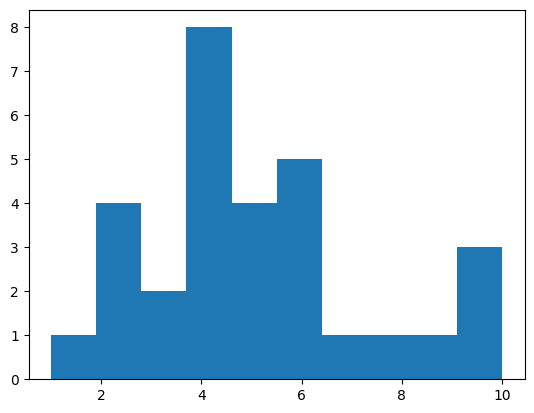

In [ ]:
import matplotlib.pyplot as plt

plt.hist(sample)
plt.show()

## Анализируем реальные данные

Посмотрим на какие-нибудь реальные данные, например, данные из [этого датасета](https://www.kaggle.com/datasets/jockeroika/life-style-data)

In [ ]:
import pandas as pd

df = pd.read_csv("https://storage.yandexcloud.net/mypub/data/obesity_level.csv")
df['Height'] = (df['Height'] * 100).astype(int)
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,169,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,156,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,171,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,171,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,191,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,176,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,171,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,181,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,170,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


Посмотрим на **описательную статистику** роста и веса:

In [74]:
df[['Height','Weight']].describe()

,Height,Weight
count,20758.000000,20758.000000
mean,169.722324,87.887768
std,8.671952,26.379443
min,145.000000,39.000000
25%,163.000000,66.000000
50%,170.000000,84.064875
75%,176.000000,111.600553
max,197.000000,165.057269


Здесь:
* count - количество элементов в выборке
* mean - среднее
* std - стандартное отклонение
* min/max - минимальное/максимальное значения
* 25%, 50%, 75% - **квартили** (их ещё называют Q1, Q2 и Q3). 25% - это значение, ниже которого находятся 25% значений выборки, 50% - половина и т.д. Значение Q2 (50%) называется **медианой**

Можно, конечно, и отдельно посчитать все эти значения, например: 

In [75]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 169.72232392330667
Variance = 75.20274967933419
Standard Deviation = 8.67195189558465


Посмотрим на гистограмму распределения:

<Axes: >

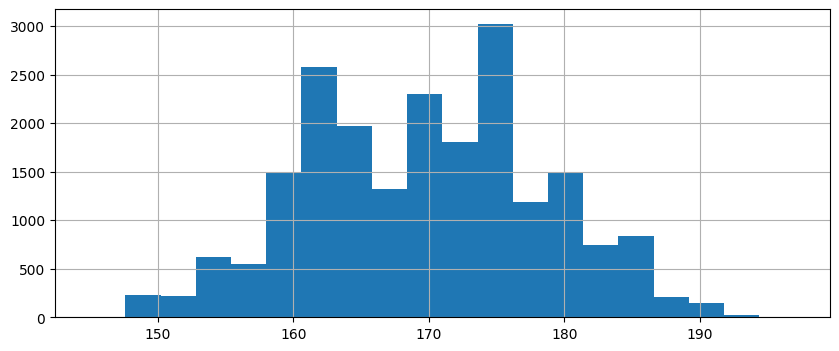

In [117]:
df['Height'].hist(bins=20,figsize=(10,4))

Помимо среднего, также рассматривают такое значение, как **медиану**. Визуализировать это можно с помощью специального вида диаграммы: **box plot**

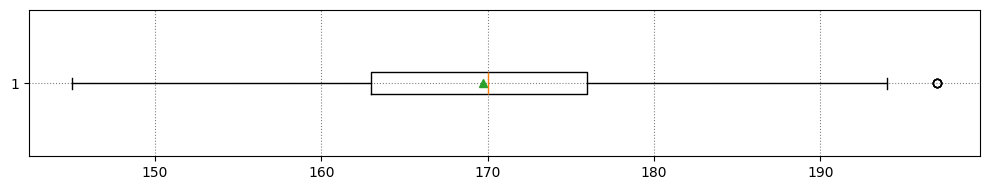

In [79]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

> **ПОЛЕЗНО**: [Более подробная статья](https://habr.com/ru/articles/879840) про то, как интерпретировать Box Plot

Медианное значение - это такое значение роста, что половина выборки имеют рост больше этого, а половина - меньше. Если медиана сильно отличается от среднего, это говорит о перекосе выборки.

In [80]:
df['Height'].median()

np.float64(170.0)

Ещё одно полезное значение - это **мода**. Это самое часто встречающееся в выборке значение:

In [81]:
df['Height'].mode()

0    170
Name: Height, dtype: int64

На картинке присутствуют точки за пределами усов. Это так называемые **выбросы** (outliers). Границы для выбросов традиционно вычисляются по формулам:
$$
\begin{array}{l}
IQR = Q3 - Q1 \\
L = Q1 - 1.5*IQR\\
R = Q3 + 1.5*IQR\\
\end{array}
$$
где IQR - межквартильный интервал, Q1/Q3 - значения квартилей, L,R - левая и правая граница выбросов. Посчитаем эти значения:

In [ ]:
Q1 = np.quantile(df['Height'], 0.25)
Q3 = np.quantile(df['Height'], 0.75)
IQR = Q3 - Q1

# Определяем границы для выбросов
R = Q3 + 1.5 * IQR
L = Q1 - 1.5 * IQR
print(f"Границы выбросов роста: [{L},{R}]")
print(f"Правые выбросы: {df['Height'][df['Height']>R]}")

Границы выбросов роста: [143.5,195.5]
Правые выбросы: 1271     197
4084     197
7272     197
11718    197
Name: Height, dtype: int64


Мы можем построить box plots для разных категорий участников в нашем датасете, например, для мужчин и женщин:

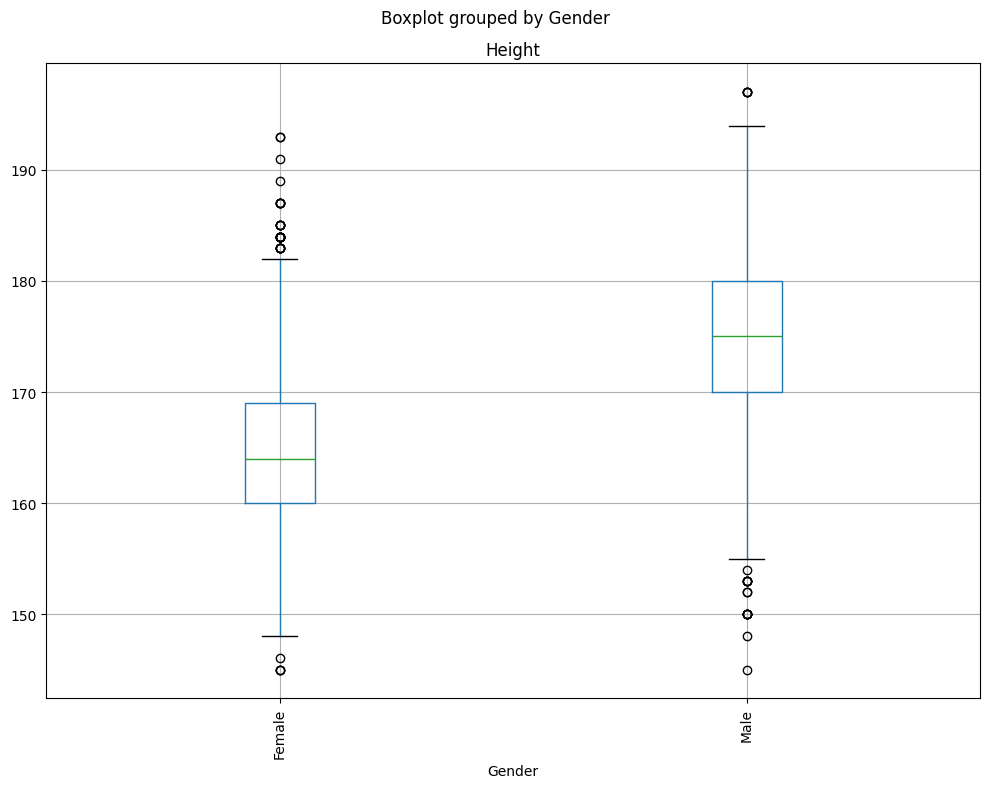

In [82]:
df.boxplot(column='Height', by='Gender', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Из этой диаграммы кажется, что в среднем мужчины выше женщин. Но так ли это? Вспомним, что мы имеем дело с некоторой выборкой из всей популяции людей. Вдруг тот факт, что попавшие в выборку мужчины в среднем выше женщин - это случайность? Вернемся к этому вопросу чуть позже. 

## Миллиардеры - ненормальное распределение

В нормальном распределении мода, медиана и среднее часто близки друг в другу. Но если распределение отличается от нормального - ситуация другая. Рассмотрим состояния миллионеров Forbes:

In [90]:
bil = pd.read_csv('https://storage.yandexcloud.net/mypub/data/forbes_2640_billionaires.csv')
bil

,rank,name,forbes_id,net_worth,age,age_range,country,source,industry,Age,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
0,1,Bernard Arnault & family,bernard-arnault,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
1,2,Elon Musk,elon-musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
2,3,Jeff Bezos,jeff-bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
3,4,Larry Ellison,larry-ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
4,5,Warren Buffett,warren-buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,Yu Rong,yu-rong,1.0,51.0,6,China,Health clinics,Healthcare,51.0,...,"Shanghai, China",China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2636,2540,"Richard Yuengling, Jr.",richard-yuengling-jr,1.0,80.0,8,United States,Beer,Food & Beverage,80.0,...,"Pottsville, Pennsylvania",United States,Divorced,4.0,"Drop Out, Lycoming College",0.0,0.0,0.0,1.0,0
2637,2540,Zhang Gongyun,zhang-gongyun,1.0,60.0,6,China,Tyre manufacturing machinery,Manufacturing,60.0,...,"Gaomi, China",China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2638,2540,Zhang Guiping & family,zhang-guiping,1.0,71.0,8,China,Real estate,Real Estate,72.0,...,"Nanjing, China",China,Married,1.0,"Bachelor of Arts/Science, South East University",1.0,0.0,0.0,0.0,1


Посмотрим на гистограмму:

<Axes: >

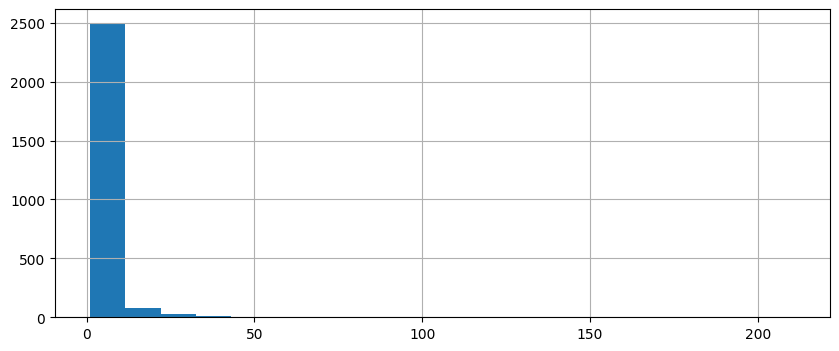

In [92]:
bil['net_worth'].hist(bins=20,figsize=(10,4))

Для более наглядного отображения в таких случаях часто строят **логарифмический график**:

<Axes: >

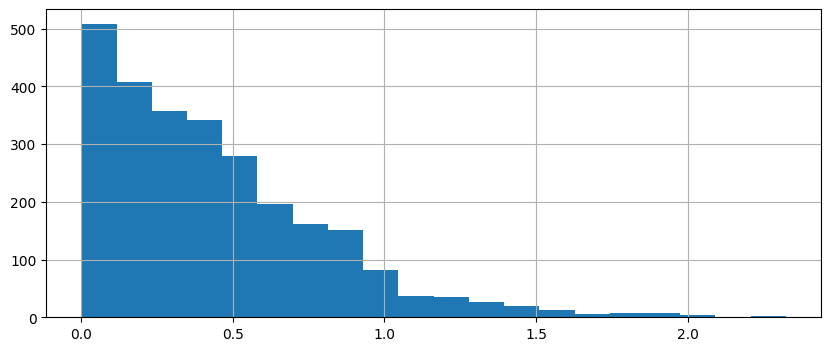

In [116]:
np.log10(bil['net_worth']).hist(bins=20,figsize=(10,4))

Посчитаем среднее, медиану и моду:

In [89]:
print(f"Среднее: {bil['net_worth'].mean()}")
print(f"Медиана: {bil['net_worth'].median()}")
print(f"Мода: {bil['net_worth'].mode()}")

Среднее: 4.623787878787878
Медиана: 2.3
Мода: 0    1.2
Name: net_worth, dtype: float64


Выводы:
* 50% миллиардеров имеют состояние ниже 2.3 миллиардов
* Среднее состояние - 4.6 миллиарда
* Самое часто встречающееся состояние - 1.2 миллиарда

## Доверительные интервалы

Вернемся к вопросу измерения роста людей. Наша таблица - это некоторая выборка из общей популяции. Если средний рост людей в нашей выборке - $h$, то какова вероятность, что средний рост всей популяции $h^*$ будет близок к нему? Об этом говорят **доверительные интервалы**.

Доверительный интервал среднего значения роста с вероятностью $p$ - это такое интервал $\mu\pm l$, что вероятность того, что $h^*$ находится в этом интервале, равна $p$.

Чтобы посчитать доверительные интервалы, используем код, [заимствованный отсюда](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):

In [108]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Height'],p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 169.72 ± 0.09
p=0.90, mean = 169.72 ± 0.10
p=0.95, mean = 169.72 ± 0.12


Доверительный интервал существенно зависит от размеров выборки. Например, если взять всего 10 элементов в нашей выборке:

In [109]:
for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Height'][:10],p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 171.50 ± 4.49
p=0.90, mean = 171.50 ± 5.23
p=0.95, mean = 171.50 ± 6.45


## Проверка гипотез

Давайте вернемся к вопросу того, действительно ли все мужчины выше женщин. Посчитаем доверительные интервалы:

In [110]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Gender']=='Male',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Gender']=='Female',['Height']],p)
    print(f'Conf={p:.2f}, male height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, female height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, male height: 175.10..175.29, female height: 164.20..164.39
Conf=0.90, male height: 175.09..175.30, female height: 164.19..164.41
Conf=0.95, male height: 175.07..175.32, female height: 164.16..164.43


Видно, что интервалы не пересекаются.

Более правильный способ проверки гипотез - это **t-критерий Стьюдента**. Он предназначен для проверки гипотез двух видов:
1. Среднее значение распределения равно некоторой заданной величине $m$
2. Средние значения двух распределений совпадают

В нашем случае мы имеем две выборки роста: для мужчин и для женщин. Выбираем две гипотезы:
* Основная гипотеза $H_0$ - средние значения роста мужчин и женщин совпадают
* Альтернативная гипотеза $H_a$ - средние значения отличаются

Для проверки мы используем пакет scipy для вычисления вероятности гипотезы $H_0$ - так называемого p-value:

In [115]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Gender']=='Male',['Height']], df.loc[df['Gender']=='Female',['Height']],equal_var=True)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 116.37
P-value: 0.0


Функция `ttest_ind` возвращает 2 значения:
* p-value - может интерпретироваться как вероятность того, что у распределений одинаковое среднее. В нашем случае она равна 0, а это значит, что гипотеза о том, что мужчины выше женшин, подтверждается
* t-value - так называемая t-статистика. Она показывает в нашем случае разницу между средними, измеренную в стандартных отклонениях, т.е. разница в росте составляет более 100 стандартных отклонений, а значит очень велика!

## Центральная предельная теорема

Предположим, мы бросаем кубик 100 раз. Каждый бросок даёт нам число от 1 до 6 с равной вероятностью. А как будет распределена сумма всех 100 бросков? Или среднее?

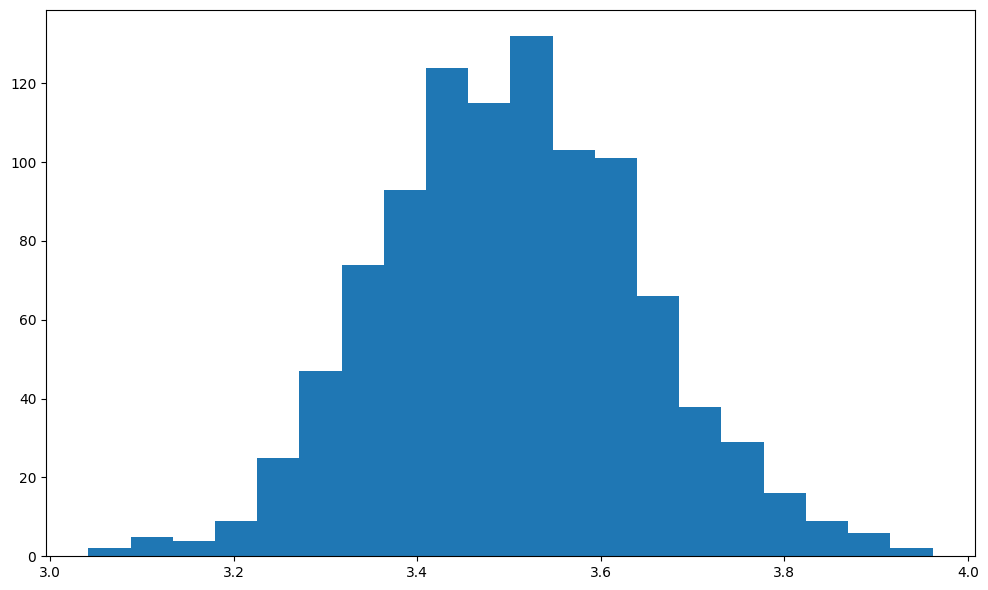

In [120]:
def normal_random(sample_size=100):
    sample = [random.uniform(1,6) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(1000)]
plt.figure(figsize=(10,6))
plt.hist(sample,bins=20)
plt.tight_layout()
plt.show()

Получается нормальное распределение! В этом заключается **центральная предельная теорема**

## Зависит ли вес от роста?

Если у нас есть 2 случайные выборки, мы можем попытаться вычислить, есть ли между ними какая-то зависимость, или корреляция.

In [121]:
df[['Weight','Height']].corr()

,Weight,Height
Weight,1.000000,0.403737
Height,0.403737,1.000000


Изображенная выше таблица называется **корреляционной матрицей**. Корелляция вычисляется по формуле:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

где:
- $x_i, y_i$ — значения переменных $X$ и $Y$,
- $\bar{x}, \bar{y}$ — средние значения переменных $X$ и $Y$,
- числитель — ковариация двух переменных,
- знаменатель — произведение стандартных отклонений $X$ и $Y$.

$r$ принимает значения от -1 до 1:
  - +1 — идеальная положительная линейная корреляция,
  - 0 — отсутствует линейная связь,
  - -1 — идеальная отрицательная линейная корреляция.

Коэффициент корреляции показывает, насколько скоординированно переменные меняются: если рост $X$ увеличивается, значит ли это, что вес $Y$ тоже увеличивается.

Корреляция — это статистическая мера, показывающая степень и направление линейной связи между двумя переменными. Эту связь можно также наглядно увидеть на графике:

Text(0, 0.5, 'Вес')

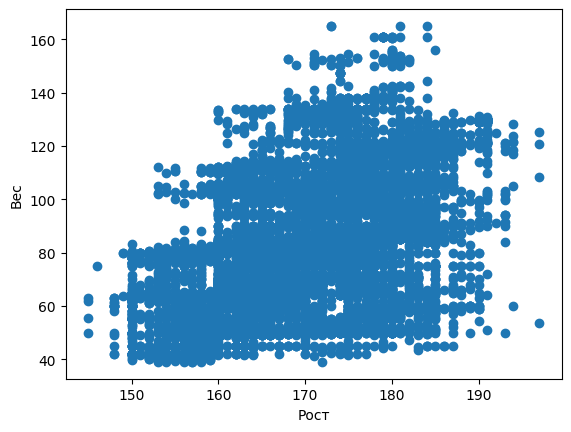

In [127]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Рост')
plt.ylabel('Вес')

## Линейная регрессия

Чтобы посмотреть, как выглядит "усреднённая зависимость" между ростом и весом, можем попробовать провести между этими точками некоторую "идеальную прямую". Такая аппроксимация зависимости между двумя (и более) переменными называется **линейной регрессией**:

In [135]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(df[['Height']],df['Weight'])
lr.coef_,lr.intercept_

(array([1.22813714]), np.float64(-120.5545207531512))

Мы получили коэффициенты для формулы предсказания веса по росту. Можем описать соответствующую функцию:

In [140]:
def weight_from_height(x):
    return x*lr.coef_[0]+lr.intercept_

weight_from_height(170)

np.float64(88.22879270476739)

И построить прямую на графике:

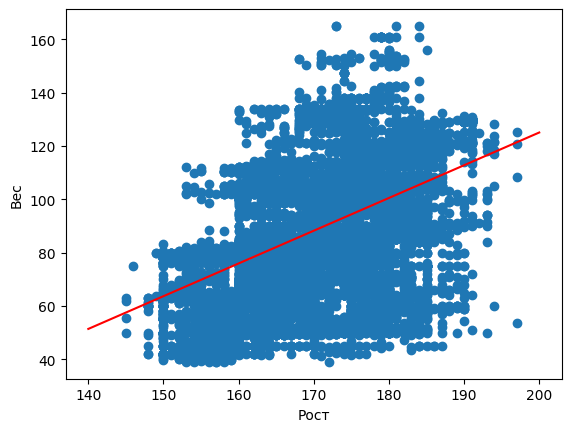

In [141]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Рост')
plt.ylabel('Вес')
x = np.array([140,200])
plt.plot(x,weight_from_height(x),color='r')

Линейная регрессия работает также для нескольких переменных. Например, попробуем учесть также возраст и пол. Поскольку пол - это нечисловая переменная (а т.н. **категориальная**), то  закодируем его числом 0 или 1:

In [146]:
df['ngender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

lr = LinearRegression().fit(df[['Height','ngender','Age']],df['Weight'])
lr.coef_,lr.intercept_

(array([ 1.74808153, 13.88488895,  1.44301327]), np.float64(-250.175938106639))

Посчитаем предполагаемый вес для мужчины и женщины 18 лет:

In [148]:
def weight_from_height(h,gender,age):
    return h*lr.coef_[0]+gender*lr.coef_[1]+age*lr.coef_[2]+lr.intercept_

print(f"Мужчина: {weight_from_height(170,0,18)}")
print(f"Женщина: {weight_from_height(170,1,18)}")


Мужчина: 72.97216066234503
Женщина: 86.85704961423735


Построив линейную регрессию мы получили **модель**, которая позволяет нам делать предсказания веса человека на основании роста, пола и возраста. Построение таких предсказательных моделей на основе данных - это предмет **машинного обучения**.

По коэффициентам линейной регрессии мы можем сделать вывод о зависимости выходной переменной (в нашем случае - вес) от входных. Например, что вес с возрастом увеличивается (примерно на 1.4 кг в год), и что женщины обычно несколько тяжелее мужчин того же роста.

## Выводы

Знание основ статистики поможет решать многие задачи в реальной жизни правильно, на основе чётких математических правил. Например, если мы проводим A/B-тестирование приложений или сайтов, мы можем использовать t-тест, чтобы обоснованно сказать, действительно ли реакция пользователей на изменения статистически значима, или это только ошибка измерений. Понимание разницы между описательными статистиками (мода, среднее, медиана) и различных распределений (нормальное, равномерное и др.) позволяет нам правильнее делать выводы о реальном мире на основе измерений.